In [1]:
%pip install -q pyarrow

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np 

In [3]:
transactions = pd.read_parquet('../../00_Data/Transaction_Data/07_merged_parquet/all_states_merged.parquet')
transactions_texas = pd.read_parquet('../../00_Data/Transaction_Data/06_PerCapitaMME/texas_year_PC.parquet')

In [4]:
transactions.head()

,BUYER_STATE,BUYER_COUNTY,TransactionYear,MME_Conversion_Factor,CALC_BASE_WT_IN_GM,morphine_equivalent_g,FIPS,county_population,per_capita_MME_mg
0,FL,ALACHUA,2006,27070.0,60803.410442,82596.618688,12001,239506,344.862420
1,FL,ALACHUA,2007,28245.5,69849.632145,95264.077667,12001,242685,392.542092
2,FL,ALACHUA,2008,30504.0,83288.688986,114679.035942,12001,244888,468.291774
3,FL,ALACHUA,2009,31367.5,101403.178507,141292.808080,12001,246657,572.831130
4,FL,ALACHUA,2010,30732.0,107187.575794,150921.955506,12001,247624,609.480323


In [5]:
transactions_texas.drop(columns=['per_capita_MME_g'], inplace=True)

In [6]:
transactions_texas

,BUYER_STATE,BUYER_COUNTY,TransactionYear,MME_Conversion_Factor,CALC_BASE_WT_IN_GM,morphine_equivalent_g,FIPS,county_population,per_capita_MME_mg
0,TX,ANDERSON,2006,7386.0,13312.256864,14731.290754,48001,57386,25.670531
1,TX,ANDERSON,2007,6318.0,12522.112408,13689.469826,48001,57870,23.655555
2,TX,ANDERSON,2008,6256.0,13553.562613,14786.688552,48001,57963,25.510565
3,TX,ANDERSON,2009,6178.5,13999.013755,15254.046518,48001,58410,26.115471
4,TX,ANDERSON,2010,6436.0,14436.461218,15613.110094,48001,58498,26.689990
...,...,...,...,...,...,...,...,...,...
2256,TX,ZAVALA,2011,408.0,1175.914100,1178.827725,48507,11872,9.929479
2257,TX,ZAVALA,2012,475.5,1317.117850,1320.255600,48507,12015,10.988395
2258,TX,ZAVALA,2013,402.0,903.455100,907.489350,48507,12203,7.436609
2259,TX,ZAVALA,2014,162.0,704.685600,704.685600,48507,12254,5.750658


In [7]:
all_transactions = pd.concat([transactions, transactions_texas], ignore_index=True)

In [8]:
annual_data = all_transactions.groupby(['BUYER_STATE', 'TransactionYear'])[['per_capita_MME_mg']].mean().reset_index()

In [12]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## Washington

YAH


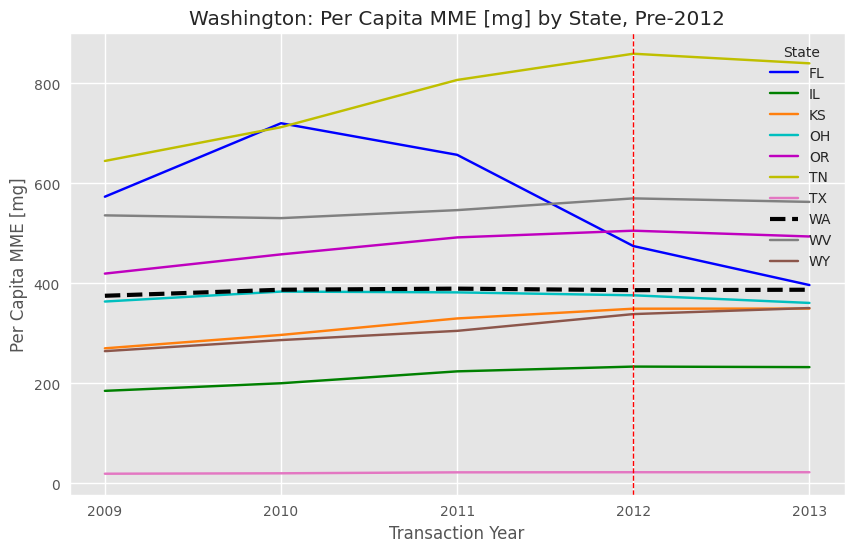

In [40]:
colors = {
    'FL': 'b',
'IL':'g',
'KS':'tab:orange',
'OH':'c',
'OR':'m',
'TN':'y',
'TX':'tab:pink',
'WA':'k',
'WV':'0.5',
'WY':'tab:brown',
}

years = [2009,2010,2011,2012,2013]
wash_data = annual_data[annual_data['TransactionYear'].isin(years)]

# Set the style for the plot (optional)
plt.style.use('ggplot')

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each state's data as a separate line
for state in wash_data['BUYER_STATE'].unique():
    if state == 'WA':
        state_data = wash_data[wash_data['BUYER_STATE'] == state]
        ax.plot(state_data['TransactionYear'], state_data['per_capita_MME_mg'], label=state, linewidth=3.0, color=colors[state], linestyle='dashed')
    else:
        state_data = wash_data[wash_data['BUYER_STATE'] == state]
        ax.plot(state_data['TransactionYear'], state_data['per_capita_MME_mg'], label=state, color=colors[state])


# Add titles and labels
ax.set_title('Washington: Per Capita MME [mg] by State, Pre-2012')
ax.set_xlabel('Year')
ax.set_ylabel('Per Capita MME [mg]')

ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

ax.axvline(x=2012, color='r', linestyle='--', linewidth=1)

# Add a legend
ax.legend(title='State')

# Show the plot
plt.show()


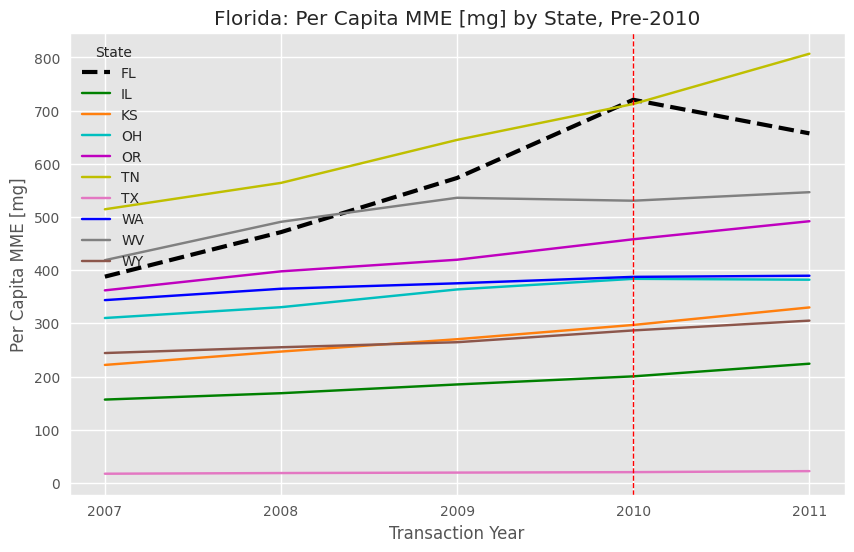

In [41]:
colors = {
'FL': 'k',
'IL':'g',
'KS':'tab:orange',
'OH':'c',
'OR':'m',
'TN':'y',
'TX':'tab:pink',
'WA':'b',
'WV':'0.5',
'WY':'tab:brown',
}

years = [2007,2008,2009,2010,2011]
fl_data = annual_data[annual_data['TransactionYear'].isin(years)]

# Set the style for the plot (optional)
plt.style.use('ggplot')

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each state's data as a separate line
for state in fl_data['BUYER_STATE'].unique():
    if state == 'FL':
        state_data = fl_data[fl_data['BUYER_STATE'] == state]
        ax.plot(state_data['TransactionYear'], state_data['per_capita_MME_mg'], label=state, linewidth=3.0, color=colors[state], linestyle='dashed')
    else:
        state_data = fl_data[fl_data['BUYER_STATE'] == state]
        ax.plot(state_data['TransactionYear'], state_data['per_capita_MME_mg'], label=state, color=colors[state])


# Add titles and labels
ax.set_title('Florida: Per Capita MME [mg] by State, Pre-2010')
ax.set_xlabel('Year')
ax.set_ylabel('Per Capita MME [mg]')

ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

ax.axvline(x=2010, color='r', linestyle='--', linewidth=1)

# Add a legend
ax.legend(title='State')

# Show the plot
plt.show()
